# Execution environment

In [1]:
import random
import math
import matplotlib.pyplot as plt

### Fish

In [2]:
# Submission

def sample_fish(turn, credit, population, food, pool_level, food_price, fry_price, expand_price, *args, **kwargs):
    def calc_capacity(pool_level):
        return 100 * pool_level ** 2
    fry = 0
    if not turn:
        fry = 20
        credit = credit - fry * fry_price
    capacity = calc_capacity(pool_level)
    harvest = population ** 2 / capacity
    credit = credit + harvest
    feed = max([0, min([capacity * 1.3 - food, credit / food_price])])
    credit = credit - feed * food_price
    expand = 0
    if credit >= expand_price * calc_capacity(pool_level+1) * 1.5:
        expand = 1
    return [harvest, feed, fry, expand], [], {}

def fish(a,b,c,d,e,f,g,h,*args,**kwargs):
    cc = lambda x:(100*e**2)
    l,m,n,o=0,0,0,0
    return [l,m,n,o], [], {}


# Training


### Test

170.49406853512232


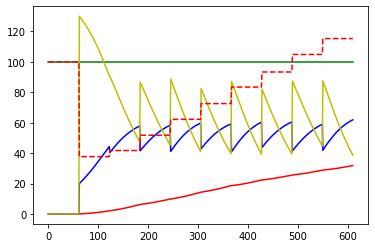

In [9]:
def episode(agent,steps):
    random.seed(100)
    credit = 100 #b
    population = 0 #c
    food = 0 #d
    pool_level = 1 #e
    food_price = random.uniform(0.4/3,0.3) #f
    fry_price =  random.uniform(4/3,3) #g
    expand_price = random.uniform(2/3,1.5) #h

    consume_rate = 0.02
    death_rate = 0.001
    args = []
    kwargs = {}

    # Display Data
    xAxis = [0]
    deathsD = [0]
    populationD = [0]
    capacityD = [100]
    creditD = [100]
    foodD = [0]

    for turn in range(steps):
        consume_rate = consume_rate + random.uniform(-0.004,0.004)
        death_rate = death_rate + random.uniform(-0.0002,0.0002)
        death_rate = min(death_rate,0.001*1.5)
        death_rate = max(death_rate,0.001*2/3)
        consume_rate = min(consume_rate,0.02*1.5)
        consume_rate = max(consume_rate,0.02*2/3)

        action, args, kwargs = agent(turn, credit, population, food, pool_level, food_price, fry_price, expand_price, *args, **kwargs)

        capacity = 100 *pool_level ** 2

        deathsD.append(deathsD[-1])
        populationD.append(population)
        foodD.append(food)
        creditD.append(credit)
        capacityD.append(capacity)
        xAxis.append(xAxis[-1]+1)

        for minute in range(60):
            eat = population * consume_rate * min([food / capacity, 1])
            if food == 0:
                eat = 0
            grown = eat * (1 - population / capacity)
            death = population * death_rate * (2. - food / capacity)
            food = max(0,food - eat)
            population = population + grown - death
            
            xAxis.append(xAxis[-1]+1)
            deathsD.append(deathsD[-1] + death)
            populationD.append(population)
            foodD.append(food)
            creditD.append(credit)
            capacityD.append(capacity)

        credit += action[0]
        population = population - action[0]
        if credit - action[1] * food_price > 0:
            credit = credit - action[1] * food_price
            food += action[1]
        if credit - action[2] * fry_price > 0:
            credit = credit - action[2] * fry_price
            population += action[2]
        
        if action[3] > 0:
            new_capacity = 100 * (pool_level + action[3]) ** 2
            if credit - new_capacity * expand_price > 0:
                credit = credit - new_capacity * expand_price
                pool_level += action[3]

    plt.plot(xAxis,deathsD,'r-',xAxis,populationD,'b-',xAxis,capacityD,'g-',xAxis,foodD,'y-',xAxis,creditD,'r--')
    return population+credit


print(episode(sample_fish,168))
